In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/ch4_scores400.csv')
# df

In [3]:
scores = df['score'].values # 2차원 = series -> 1차원

In [4]:
scores[:10] 

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [5]:
np.random.choice([1,2,3],3) # choice: 값을 추출/ range=arrange/ replace: 복원(기본값), 중복값 또 추출 가능

array([1, 3, 1])

In [6]:
np.random.choice([1,2,3],3,replace=False) # 비복원

array([2, 3, 1])

In [7]:
np.random.seed(0) # seed: 랜덤값 고정
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [8]:
np.random.choice([1,2,3],3) # seed와 결합해야 결과값이 고정됨

array([2, 2, 3])

In [9]:
# np.random.seed(0)
sample = np.random.choice(scores,20)
sample.mean() # 표본의 평균값

73.55

In [10]:
scores.mean() # 모집단의 평균값

69.53

In [11]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f"{i+1}번째 무작위 추출로 얻은 표본평균",sample.mean()) # 계속 추출을 하면 정규분포 형태 띔
    # 값이 모평균 주변으로 나옴

1번째 무작위 추출로 얻은 표본평균 67.6
2번째 무작위 추출로 얻은 표본평균 61.2
3번째 무작위 추출로 얻은 표본평균 71.2
4번째 무작위 추출로 얻은 표본평균 74.75
5번째 무작위 추출로 얻은 표본평균 73.7


In [12]:
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21] # 불공정한 주사위

In [13]:
num_trial = 100
sample = np.random.choice(dice,num_trial,p = prob)
sample

array([4, 2, 5, 5, 3, 5, 2, 5, 6, 4, 5, 2, 6, 4, 3, 5, 1, 6, 1, 5, 3, 6,
       6, 3, 5, 5, 5, 3, 6, 4, 6, 5, 4, 6, 4, 6, 5, 6, 5, 6, 5, 6, 5, 4,
       5, 1, 4, 5, 4, 5, 4, 2, 4, 5, 5, 5, 5, 5, 4, 6, 4, 4, 6, 6, 5, 2,
       6, 5, 6, 3, 6, 3, 5, 2, 6, 6, 5, 4, 2, 5, 4, 6, 6, 6, 6, 1, 4, 6,
       3, 5, 2, 3, 1, 6, 3, 4, 6, 5, 1, 3])

In [14]:
# 도수분포표: 어떤 값이 얼마나 나왔나
# 상대도수: 확률

In [15]:
freq, _ = np.histogram(sample,bins=6,range=(1,7))
pd.DataFrame({'frequency':freq,
             'relative frequency': freq/num_trial},
             index = pd.Index(np.arange(1,7),name = 'dice'))

,frequency,relative frequency
dice,,
1,6,0.06
2,8,0.08
3,11,0.11
4,18,0.18
5,30,0.30
6,27,0.27


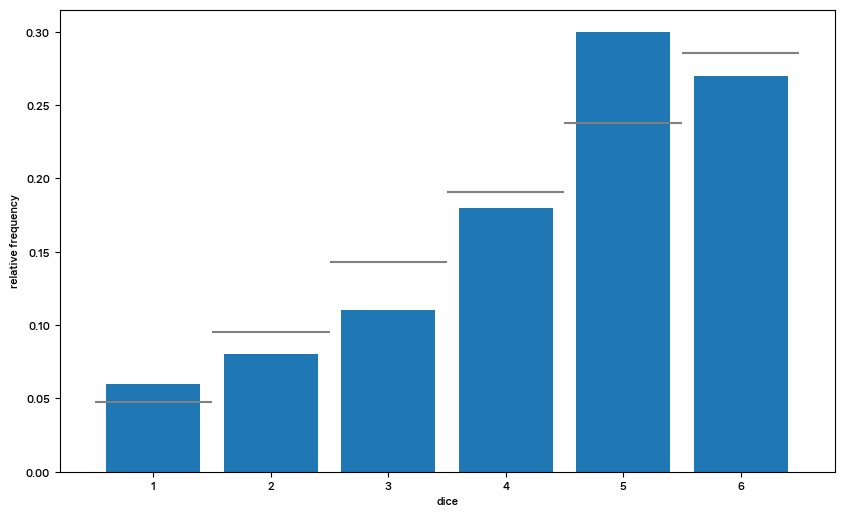

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample,bins=6,range=(1,7),density=True,rwidth=0.8) # density=True: 막대그래프 총 면적 1/ rwidth:막대그래프간 간격
ax.hlines(prob,np.arange(1,7),np.arange(2,8),colors='gray') # ax.hlines(prob, 최소, 최대)
ax.set_xticks(np.linspace(1.5,6.5,6)) # 눈금 6개 만들어짐
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

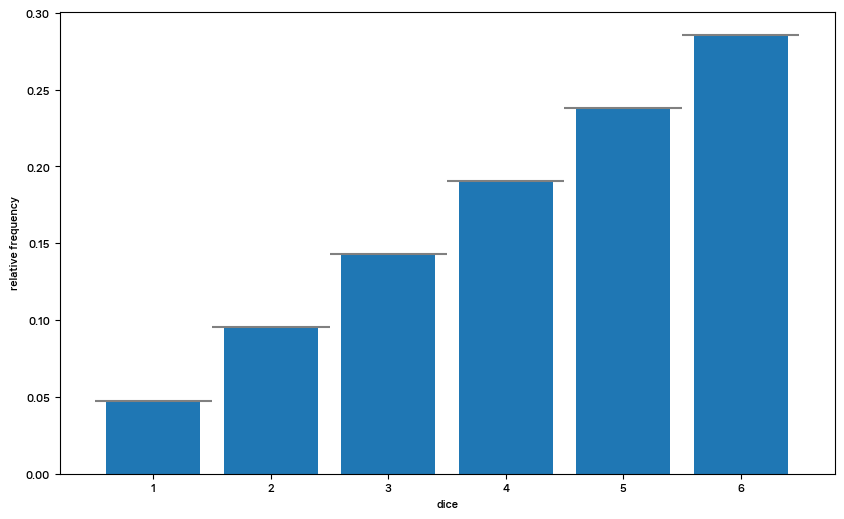

In [17]:
num_trial = 1000000 # 실행의 횟수가 증가할수록 각 확률에 수렴
sample = np.random.choice(dice,num_trial,p = prob)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample,bins=6,range=(1,7),density=True,rwidth=0.8) # density=True: 막대그래프 총 면적 1
ax.hlines(prob,np.arange(1,7),np.arange(2,8),colors='gray') # ax.hlines(prob, 최소, 최대)
ax.set_xticks(np.linspace(1.5,6.5,6)) # 눈금 6개 만들어짐
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

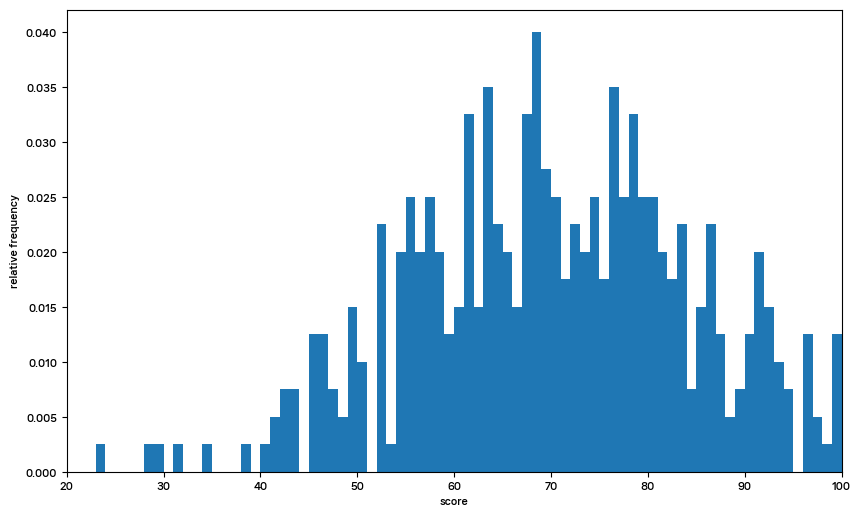

In [18]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100,range=(0,100),density=True)
ax.set_xlim(20,100) # x축이 표시되는 지점을 지정
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

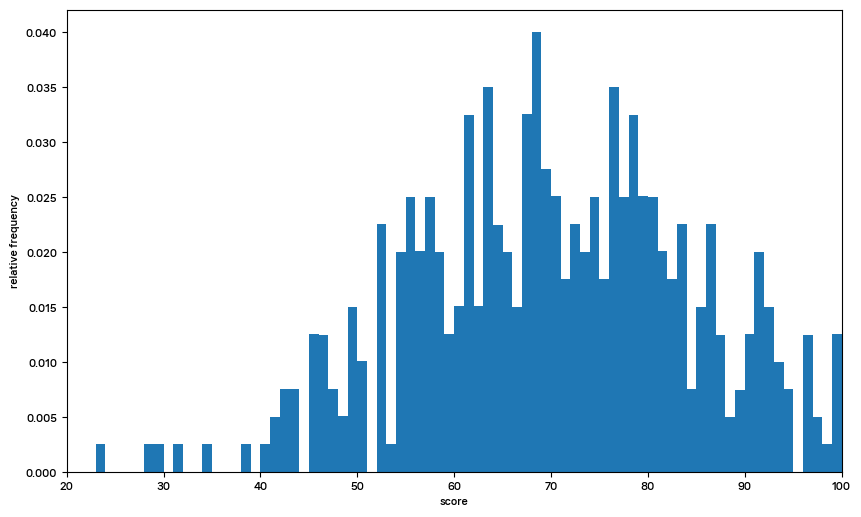

In [19]:
sample = np.random.choice(scores, 10000000) # 횟수가 증가할수록(표본의 크기가 커질수록) 실제의 확률분포와 가까워짐
# 복원추출이라도 여러 번 하면 모집단과 유사해짐
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100,range=(0,100),density=True) # scores를 sample로 변경
ax.set_xlim(20,100) # x축이 표시되는 지점을 지정
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show() 
# 69점을 얻은 학생은 전교생의 0.04%이므로 무작위 추출을 수행하면 4% 확률로 69점이라는 표본데이터 획득

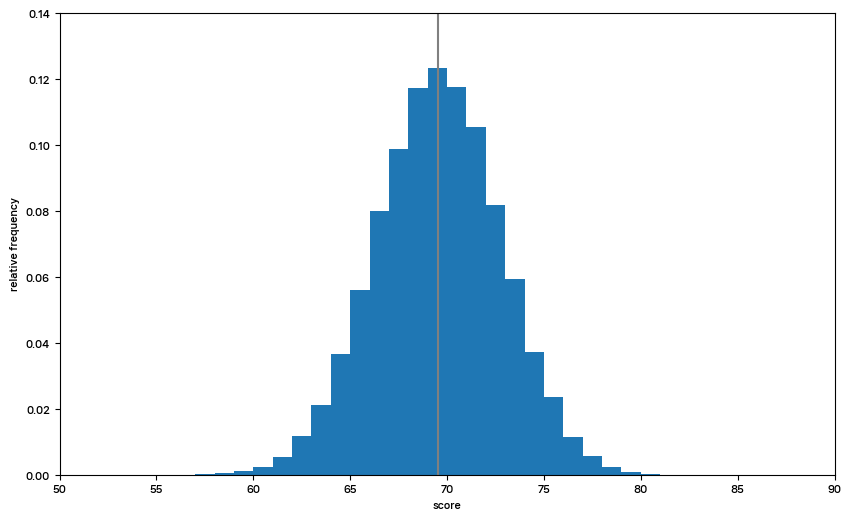

In [23]:
sample_means = [ np.random.choice(scores,20).mean() 
                for _ in range(100000)] # 값을 받을 필요가 없어서 변수 선언 안 함/ 복원추출
# sample_means
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means,bins=100,range=(0,100),density=True)
ax.vlines(np.mean(scores),0,1,'gray')
ax.set_xlim(50,90)
ax.set_ylim(0,0.14)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()
# 모평균을 중심으로 정규분포 형태, 좌우 대칭